In [ ]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

path="/home/souranil/Source-Code/Final Year Project/Codebase/Project Dataset/"

Dataset Preperation

In [2]:
print("The total number of datapoints: ", len(os.listdir(path+"Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Face images/"+i).shape[0],cv2.imread(path+"Face images/"+i).shape[1], 1]

print(image_metadata)
image_metadata.to_csv(path+"faces.csv")

The total number of datapoints:  2204
      height  width  class
0        350    500      1
1       1241   1000      1
2        957   1300      1
3       4000   2667      1
4        867   1300      1
...      ...    ...    ...
2199     236    236      1
2200     318    236      1
2201     157    236      1
2202     354    236      1
2203     236    236      1

[2204 rows x 3 columns]


In [4]:
print("The total number of datapoints: ", len(os.listdir(path+"Non Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Non Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Non Face images/"+i).shape[0],cv2.imread(path+"Non Face images/"+i).shape[1], 0]

print(image_metadata)
image_metadata.to_csv(path+"non faces.csv")

The total number of datapoints:  2256
      height  width  class
0        640    640      0
1        640    640      0
2        640    640      0
3        640    640      0
4        640    640      0
...      ...    ...    ...
2251     640    640      0
2252     640    640      0
2253     640    640      0
2254     640    640      0
2255     640    640      0

[2256 rows x 3 columns]


Resizing the images to a common size 

In [5]:
data=pd.read_csv(path+"faces.csv")
height_mean1=data['height'].mean()
width_mean1=data['width'].mean()

print("Height: ",height_mean1,"Width: ", width_mean1)
data=pd.read_csv(path+"non faces.csv")
height_mean2=data['height'].mean()
width_mean2=data['width'].mean()

print("Height: ",height_mean2,"Width: ", width_mean2)

height_mean=(height_mean2+height_mean1)/2
width_mean=(width_mean2+width_mean1)/2
print("Height: ",height_mean,"Width: ", width_mean)

Height:  874.8611615245009 Width:  956.5453720508167
Height:  1120.2056737588653 Width:  1322.163120567376
Height:  997.5334176416831 Width:  1139.3542463090962


In [20]:
size=150
for i in os.listdir(path+"Face images/"):
    image_data=cv2.imread(path+"Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Face images/"+i, img=image_data)
    
for i in os.listdir(path+"Non Face images/"):
    image_data=cv2.imread(path+"Non Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Non Face images/"+i, img=image_data)

Extracting data from the reshaped images

In [ ]:
X=[]
image_file_names=os.listdir(path+"Face images/")
temp=None
for i in os.listdir(path+"Face images/"):
    temp=np.divide(cv2.imread(path+"Face images/"+i),255, dtype=np.float64)
    X.append(temp)

image_file_names=os.listdir(path+"Non Face images/")
for i in os.listdir(path+"Non Face images/"):
    temp=np.divide(cv2.imread(path+"Non Face images/"+i), 255, dtype=np.float64)
    X.append(temp)

X=np.array(X)
X=X.reshape([4460, 67500])
np.savetxt(path+"dataset.csv", X, delimiter=',', fmt='%f')
y=[0.00]*len(os.listdir(path+"Face images/"))+[1.00]*len(os.listdir(path+"Non Face images/"))
y=np.array(y, dtype=np.float64)
np.savetxt(path+"labels.csv", y, delimiter=',', fmt='%f')

In [2]:
X=np.loadtxt(path+'dataset.csv', delimiter=',')
X=X.reshape([4460, 150, 150, 3])
y=np.loadtxt(path+'labels.csv', delimiter=',')

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42, train_size=0.85)
print(len(X_train), len(X_test))

X=None
y=None

3791 669


Building the Model with Tensorflow / Keras

In [58]:
gpu=tf.config.list_physical_devices('GPU')
print(gpu[0])
model=Sequential()

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [59]:
model.add(Conv2D(50, (4,4), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((3,3), strides=2))

model.add(Conv2D(70, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(90, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/souranil/Source-Code/Final Year Project/Codebase/project/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [61]:
model.fit(X_train, y_train, epochs=5, batch_size=10)

Epoch 1/5


2025-01-20 12:36:16.540732: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[10,70,71,71]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,50,73,73]{3,2,1,0}, f32[70,50,3,3]{3,2,1,0}, f32[70]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


380/380 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8544 - loss: 0.7221
Epoch 2/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9772 - loss: 0.0836
Epoch 3/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9745 - loss: 0.0679
Epoch 4/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9881 - loss: 0.0340
Epoch 5/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9711 - loss: 0.1016


In [62]:
model.evaluate(X_test, y_test)

2025-01-20 12:37:45.917722: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,70,71,71]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,50,73,73]{3,2,1,0}, f32[70,50,3,3]{3,2,1,0}, f32[70]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9844 - loss: 0.0359

2025-01-20 12:37:47.460316: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[29,70,71,71]{3,2,1,0}, u8[0]{0}) custom-call(f32[29,50,73,73]{3,2,1,0}, f32[70,50,3,3]{3,2,1,0}, f32[70]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9845 - loss: 0.0367


[0.04502652958035469, 0.9850522875785828]

In [15]:
print(model.input_shape)

(None, 150, 150, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[1.]


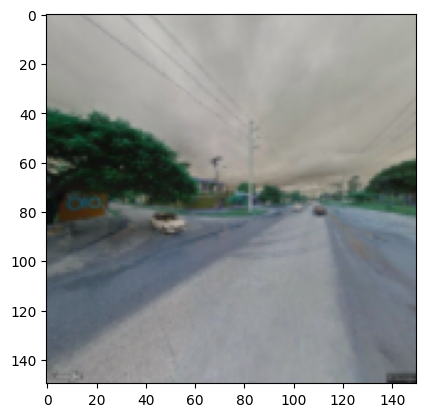

In [151]:
import matplotlib.cm
from matplotlib.colors import ListedColormap,Colormap

index=random.randint(0, len(X_test)-1)
plt.imshow(X_test[index])

# print(input.shape)
y_pred=model.predict(X_test[[index]])
print(np.round(y_pred[0]))

out_name="model1.keras"
model.save("/home/souranil/Source-Code/Final Year Project/Codebase/Model/"+out_name)
